In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, AgglomerativeClustering, SpectralClustering, OPTICS, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
#reading in the data
df = pd.read_csv('https://raw.githubusercontent.com/nimoru7/schulich_data_science/refs/heads/main/Customer_Data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

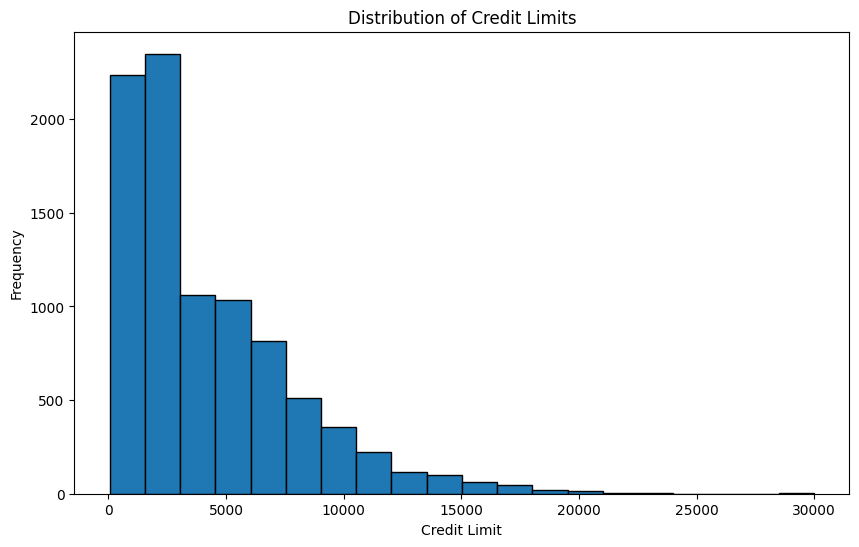

In [5]:
# @title Distribution of Credit Limits

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['CREDIT_LIMIT'], bins=20, edgecolor='black')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Credit Limits')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

So basically we are missing a minium payment value and a credit limt value

In [7]:
#confirming the missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#So we are describing to see stuff
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#technically it is possible to have no limit on the creditcard, so I want to set the missing value to the max value
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].max(), inplace=True)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_41595/2303126120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].max(), inplace=True)


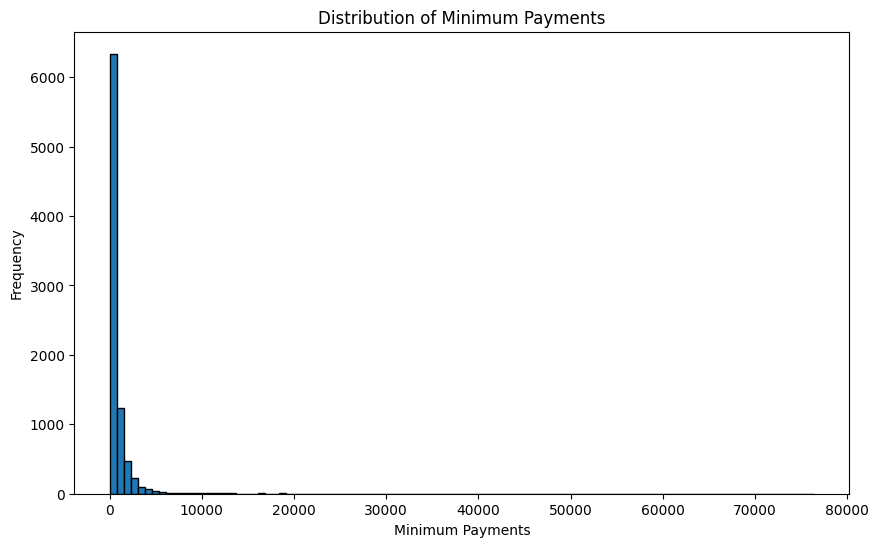

In [10]:
#I want to look at the distubtion of the values of the minium payments

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['MINIMUM_PAYMENTS'],bins=100, edgecolor='black')
plt.xlabel('Minimum Payments')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Minimum Payments')


In [11]:
df['MINIMUM_PAYMENTS'].mode()

0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64

In [12]:
df['MINIMUM_PAYMENTS'].median()

312.343947

In [13]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [14]:
#based on the above and the numbers it makes the most sense to set it as the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_41595/2526962048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [15]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

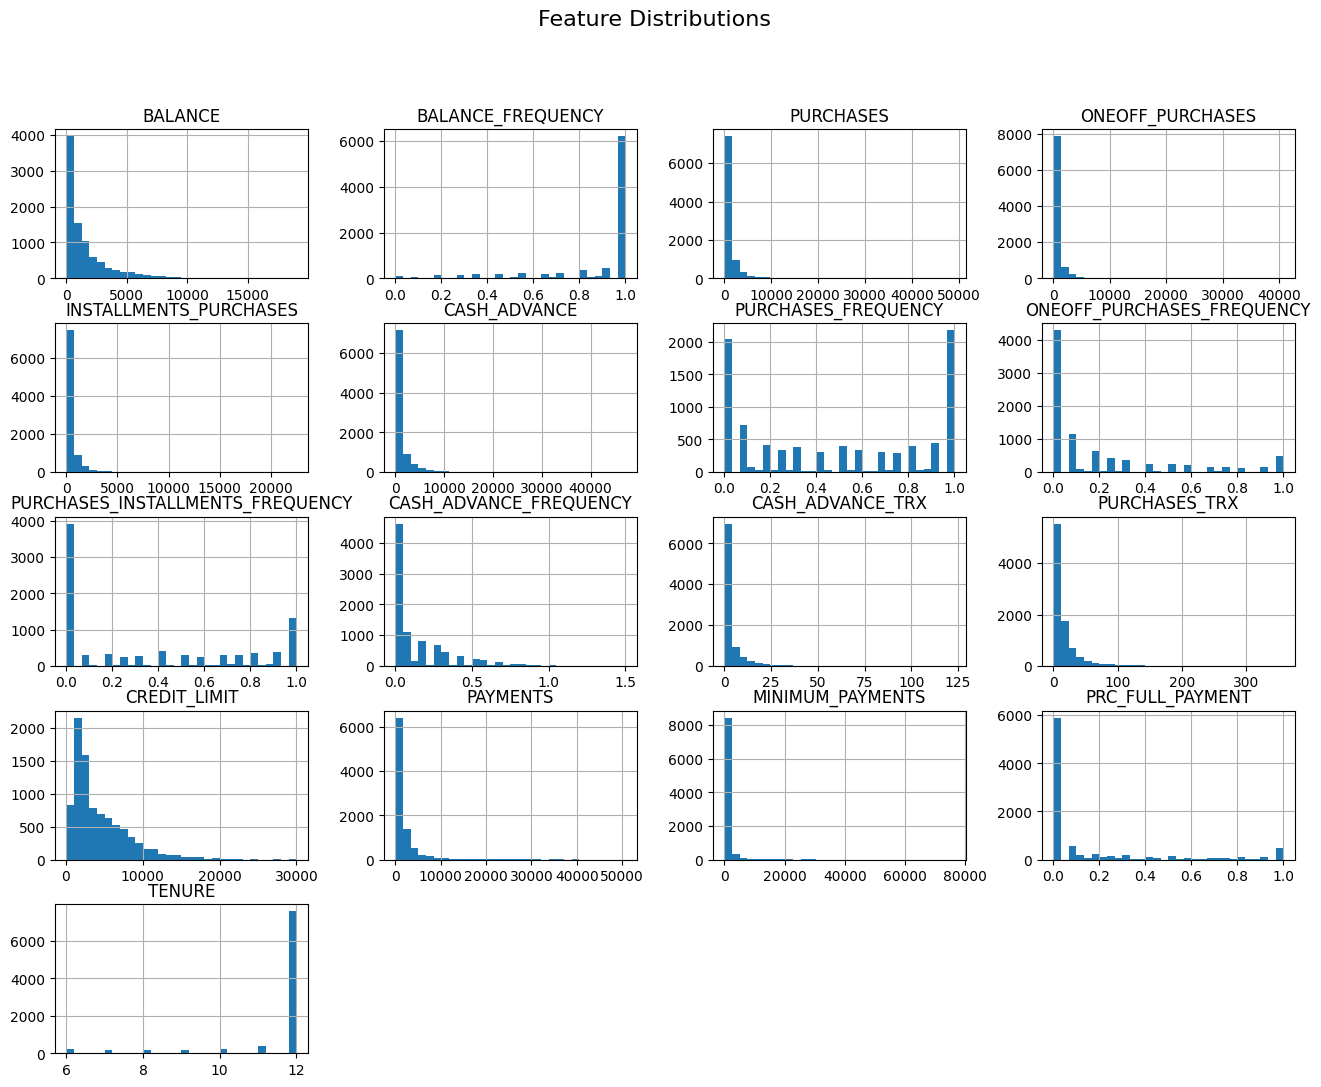

In [16]:
#producing muliple histograms to compare the distrubtions
df.hist(figsize=(16, 12), bins=30)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

BALANCE: Strong right skewness.

PURCHASES: Strong right skewness.

CASH_ADVANCE: Extreme skewness.

ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, and PURCHASE_FREQUENCIES: Also highly skewed, particularly with a large concentration around small values or zero.

PAYMENTS, MINIMUM_PAYMENTS, CREDIT_LIMIT: Right-skewed distributions that may require transformation to reduce the influence of extreme values.

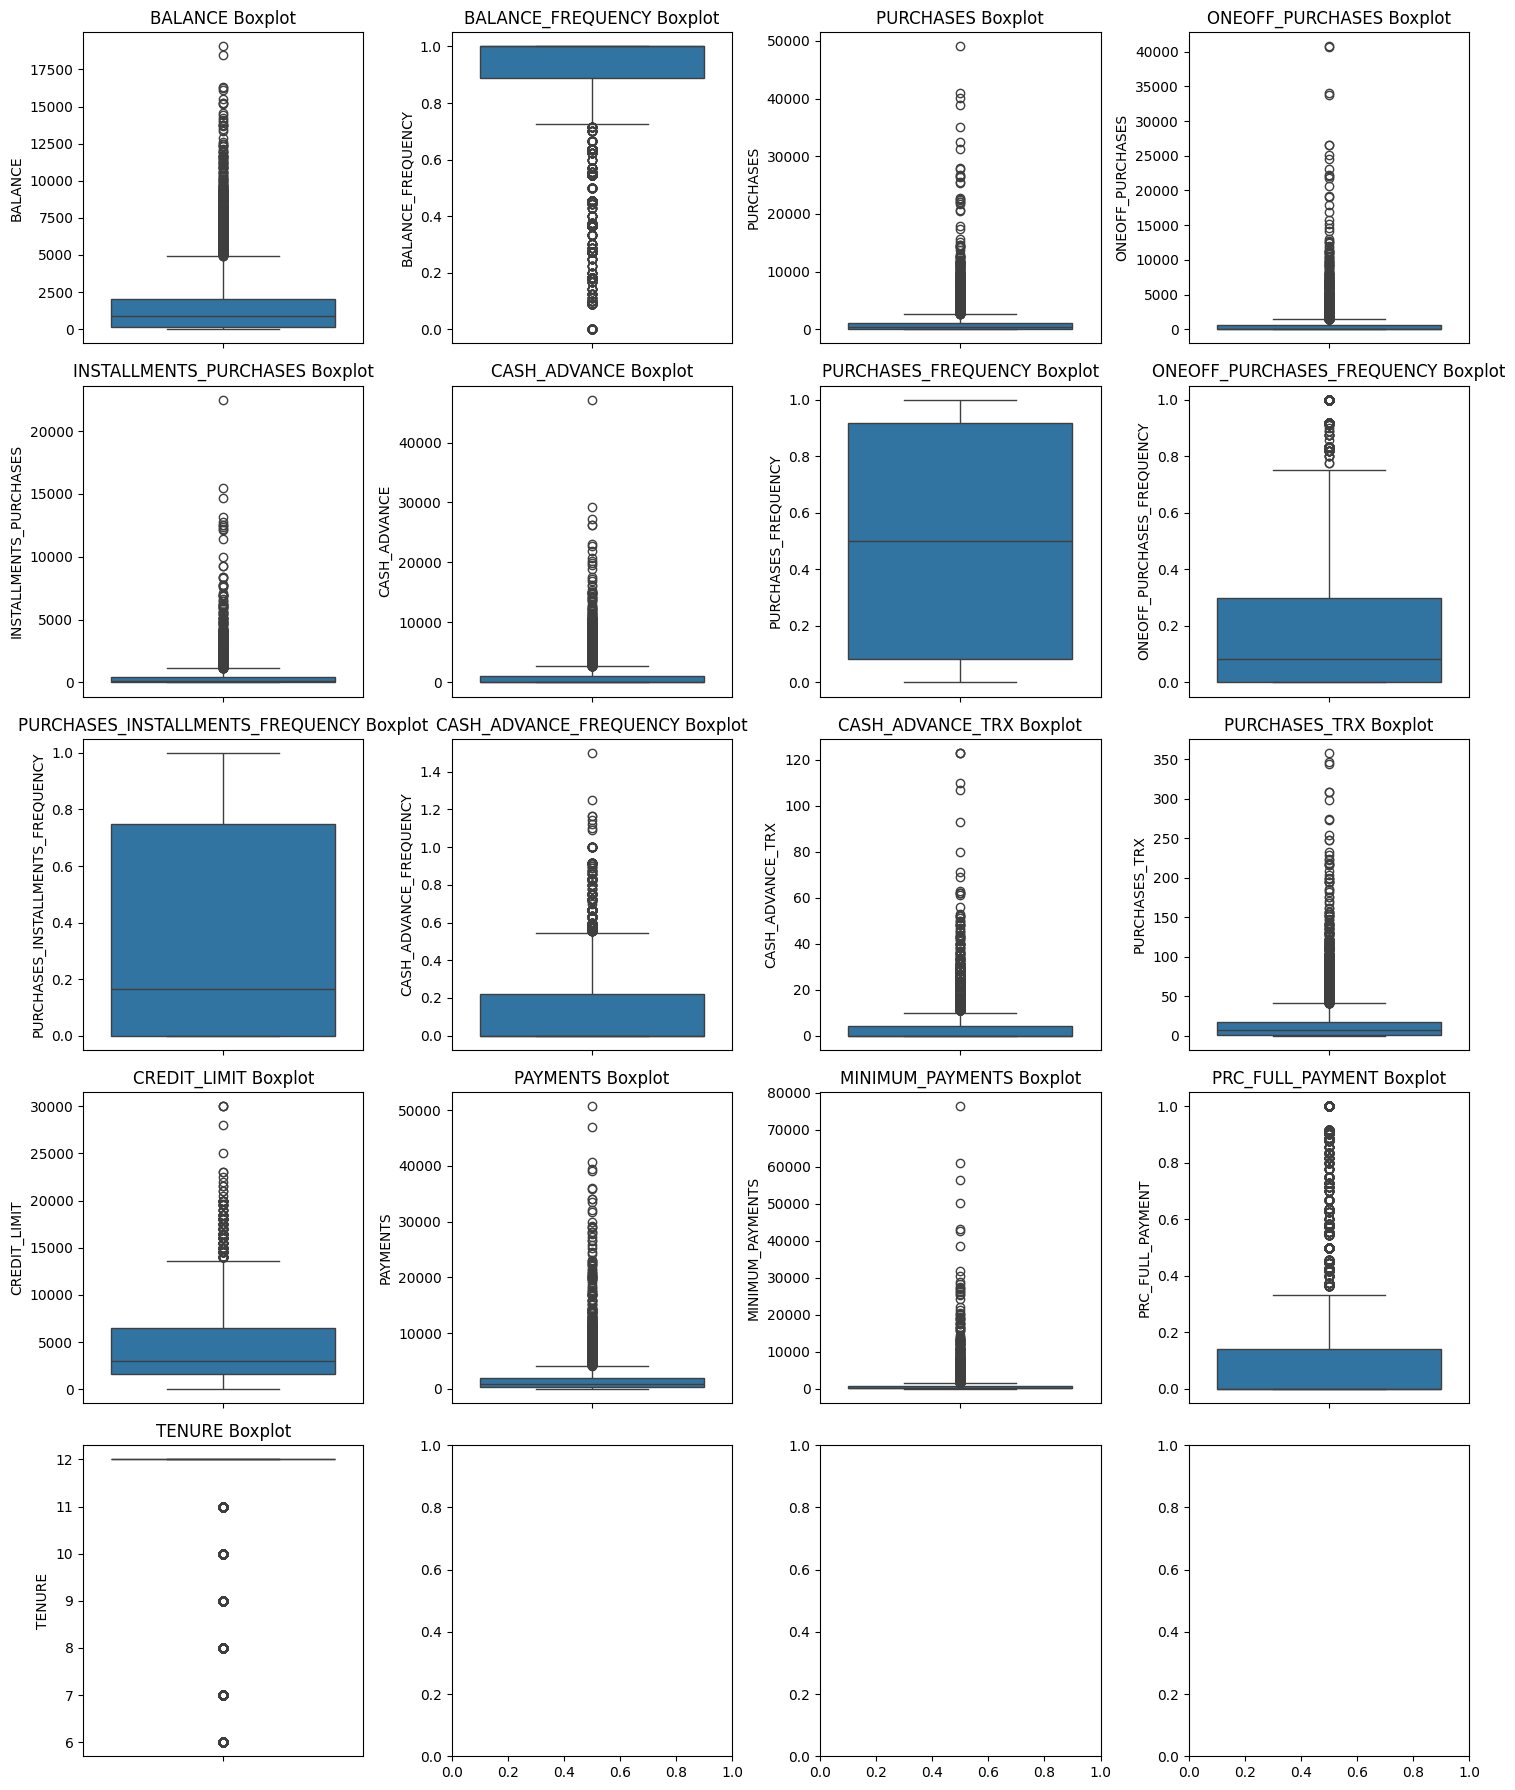

In [17]:
num_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
               'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
               'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
               'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
               'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Create a figure with subplots to display boxplots for each numeric feature
fig, axes = plt.subplots(5, 4, figsize=(15, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Purchase frequency had really defined quadrant, so did purchase installments frequency.
It also helps us see the outliers which can have a large impact on clusters. Basically everything that is not well defined has so many outliers. This might need to be dealt wiht

In [19]:
#The boxplot shows us there are a shit ton of outliers, and it is best to handle the outliers before featuring engineering

In [18]:
#So there are a lot of outliers, however many of them are lemintate, so we are going to cap them
# Capping at 1st and 99th percentiles
# Select only numerical columns for quantile calculation
numerical_df = df.select_dtypes(include=np.number)

lower_bound = numerical_df.quantile(0.01)
upper_bound = numerical_df.quantile(0.99)  # Corrected: Using numerical_df instead of 'data'

# Apply clipping to the original DataFrame using the calculated bounds for numerical columns
for col in lower_bound.index:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [21]:
#the distribution is still shit, so we want to change that

In [19]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
data_no_outliers = df[~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)]

In [20]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.046707,0.878083,936.229237,536.493774,384.498368,935.920972,0.490351,0.202458,0.364437,0.134017,3.079330,14.151385,4475.818786,1649.420364,747.406471,0.153715,11.517318
std,1966.597484,0.234032,1525.185179,1096.913512,676.271068,1775.774147,0.401371,0.298336,0.397448,0.195550,5.523724,20.962159,3553.532910,2251.668769,1232.748218,0.292499,1.338331
min,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,20.040613,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,9338.804814,1.000000,8977.290000,6689.898200,3886.240500,9588.163357,1.000000,1.000000,1.000000,0.833333,29.000000,116.510000,17000.000000,13608.715541,8626.691541,1.000000,12.000000


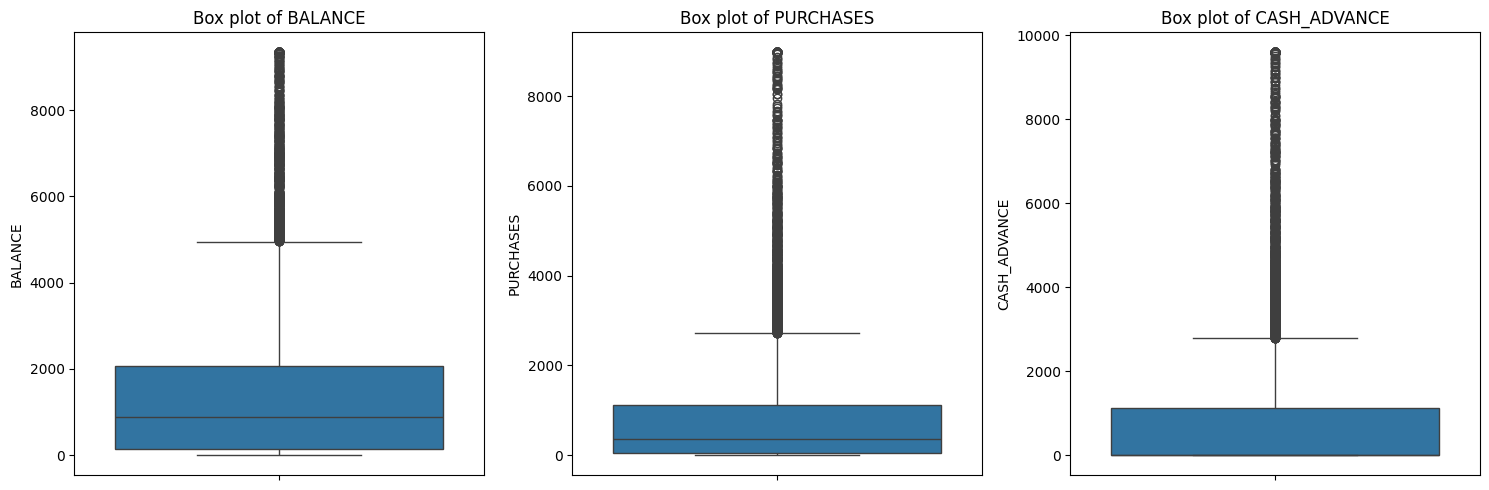

In [21]:
num_columns2 = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']

# Create subplots: the layout will be 1 row with 3 columns
plt.figure(figsize=(15, 5))  # Adjust the figure size as necessary

# Loop over the features and create subplots
for i, feature in enumerate(num_columns2):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, index starts at 1
    sns.boxplot(y=df[feature])  # Create the boxplot
    plt.title(f'Box plot of {feature}')  # Set title for each subplot

# Adjust layout
plt.tight_layout()  # Ensures everything fits without overlap

# Show the plot
plt.show()

In [22]:
# Apply log transformation to compress skewed values
df = df.apply(lambda x: np.log1p(x) if x.name in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE'] else x)

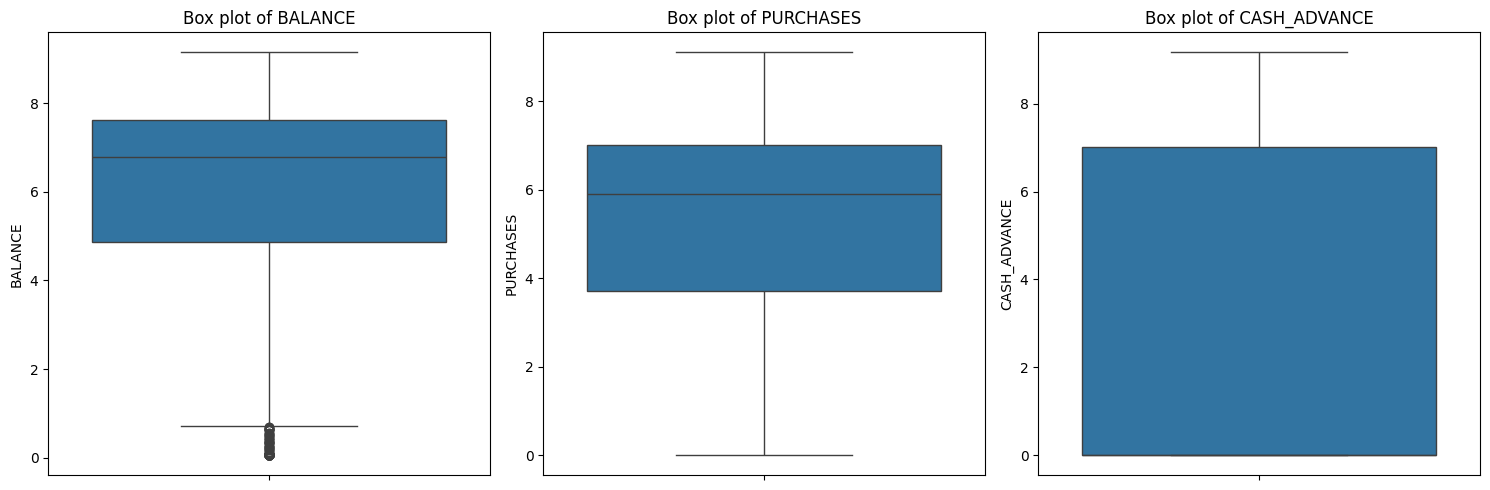

In [23]:
#Fixing the extreme skewness
num_columns3 = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(num_columns3):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box plot of {feature}')


plt.tight_layout()
plt.show()

# Feature Engineering

In [24]:
# Average Installement to Purchases Amount
df['AVG_INSTALLMENT_PURCHASE_AMOUNT'] = df['PURCHASES'] / (df['INSTALLMENTS_PURCHASES'] + 1)

# Balance to credit limit ratio
df['BALANCE_TO_CREDIT_LIMIT'] = df['BALANCE'] / df['CREDIT_LIMIT']

# Payment to balance ratio
df['PAYMENT_TO_BALANCE_RATIO'] = df['PAYMENTS'] / (df['BALANCE'] + 1)

# Overall purchase frequency
df['OVERALL_PURCHASE_FREQUENCY'] = df['PURCHASES_FREQUENCY'] + df['ONEOFF_PURCHASES_FREQUENCY'] + df['PURCHASES_INSTALLMENTS_FREQUENCY']

# Cash advance to credit limit ratio
df['CASH_TO_CREDIT_RATIO'] = df['CASH_ADVANCE'] / df['CREDIT_LIMIT']

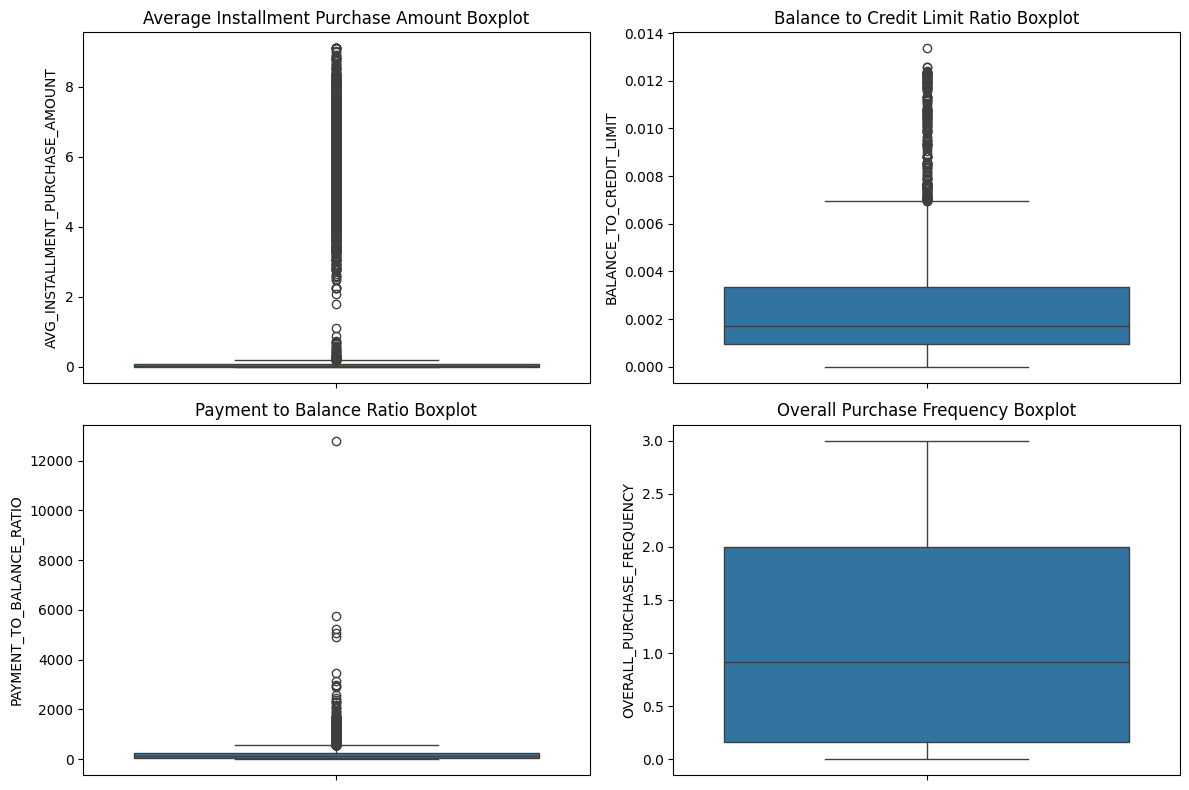

In [25]:
# Visualize the distribution of new features
plt.figure(figsize=(12, 8))


# Average Installment Purchase Amount Boxplot
plt.subplot(2, 2, 1)  # First subplot
sns.boxplot(y=df['AVG_INSTALLMENT_PURCHASE_AMOUNT'])
plt.title('Average Installment Purchase Amount Boxplot')


# Balance to Credit Limit Ratio Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df['BALANCE_TO_CREDIT_LIMIT'])
plt.title('Balance to Credit Limit Ratio Boxplot')

# Payment to Balance Ratio Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(y=df['PAYMENT_TO_BALANCE_RATIO'])
plt.title('Payment to Balance Ratio Boxplot')

# Overall Purchase Frequency Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(y=df['OVERALL_PURCHASE_FREQUENCY'])
plt.title('Overall Purchase Frequency Boxplot')

plt.tight_layout()
plt.show()

Insights:

* Average Installment Purchase Amount: Most customers make small installment purchases, but a few have significantly larger amounts, creating outliers.

* Balance to Credit Limit Ratio: Most customers use less than 50% of their credit limit, with a few outliers using close to or exceeding their limit.

* Payment to Balance Ratio: The majority of customers have very low ratios, but there are extreme outliers with ratios above 2000, suggesting large payments relative to their balances.

* Overall Purchase Frequency: The distribution is more evenly spread, with most customers falling between 0.5 and 1.5, indicating moderate purchase activity across types.

In [26]:
df.shape

(8950, 23)

**Scale Data**

In [29]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
#Scale the data (excluding 'CUST_ID')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['CUST_ID']))

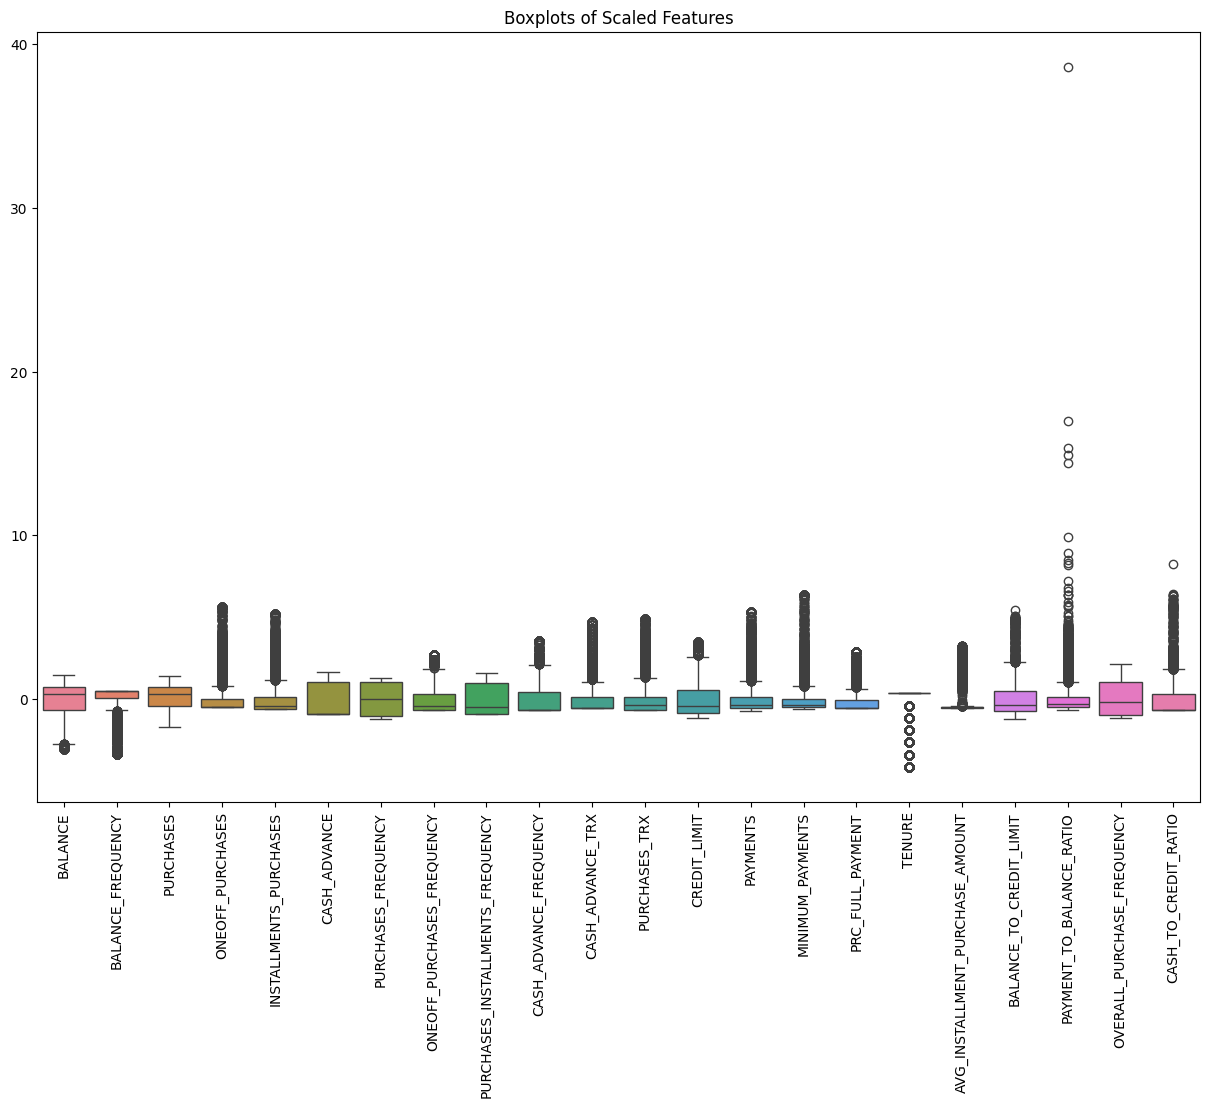

In [31]:
# Plot boxplots after scaling
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns.drop('CUST_ID'))
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled_df)
plt.xticks(rotation=90)
plt.title('Boxplots of Scaled Features')
plt.show()

Note:
features to drop
* ONEOFF_PURCHASES (due to high correlation with PURCHASES)
* PURCHASES_FREQUENCY (due to high correlation with PURCHASES_INSTALLMENTS_FREQUENCY)
* TENURE (due to low correlation with most features)
* Optionally, either CASH_TO_CREDIT_RATIO or BALANCE_TO_CREDIT_LIMIT (if you find they provide redundant information, keep the one that aligns best with your analysis goals).

features to keep
* BALANCE: Remaining balance in the cardholder’s account.
* BALANCE_FREQUENCY: Frequency of balance updates.
* PURCHASES: Total amount of purchases made.
* INSTALLMENTS_PURCHASES: Purchases made in installments.
* CASH_ADVANCE: Amount of cash advance taken by the user.
* ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchases.
* PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases.
* CASH_ADVANCE_FREQUENCY: Frequency of cash advance repayments.
* CASH_ADVANCE_TRX: Number of cash advance transactions.
* PURCHASES_TRX: Number of purchase transactions.
* CREDIT_LIMIT: Credit limit assigned to the user.
* PAYMENTS: Total payments made by the user.
* MINIMUM_PAYMENTS: Minimum payments made by the user.
* PRC_FULL_PAYMENT: Percentage of full payments made.
* AVG_INSTALLMENT_PURCHASE_AMOUNT (engineered): Average amount for installment purchases.
* BALANCE_TO_CREDIT_LIMIT (engineered): Ratio of balance to credit limit.
* PAYMENT_TO_BALANCE_RATIO (engineered): Ratio of payment to balance.
* OVERALL_PURCHASE_FREQUENCY (engineered): Overall frequency of purchases.

# **3. Clustering Algorithms**

In [29]:
# Features to keep in models
features_to_keep = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
    'AVG_INSTALLMENT_PURCHASE_AMOUNT',  # Engineered feature
    'BALANCE_TO_CREDIT_LIMIT',  # Engineered feature
    'PAYMENT_TO_BALANCE_RATIO',  # Engineered feature
    'OVERALL_PURCHASE_FREQUENCY'  # Engineered feature
]

# New df
df_new = df[features_to_keep].copy()
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,AVG_INSTALLMENT_PURCHASE_AMOUNT,BALANCE_TO_CREDIT_LIMIT,PAYMENT_TO_BALANCE_RATIO,OVERALL_PURCHASE_FREQUENCY
0,3.735304,0.818182,4.568506,95.4,0.000000,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,0.047391,0.003735,42.616503,0.250000
1,8.071989,0.909091,0.000000,0.0,8.770896,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,0.000000,0.001153,452.274861,0.000000
2,7.822504,1.000000,6.651791,0.0,0.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,6.651791,0.001043,70.509089,2.000000
3,7.419183,0.636364,7.313220,0.0,5.331694,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,7.313220,0.000989,0.000000,0.166666
4,6.707735,1.000000,2.833213,0.0,0.000000,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,2.833213,0.005590,88.007014,0.166666


In [30]:
df_new.shape

(8950, 18)

**Scale Data**

In [33]:
# Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)

# Elbow Method
Identify optimal k

In [34]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

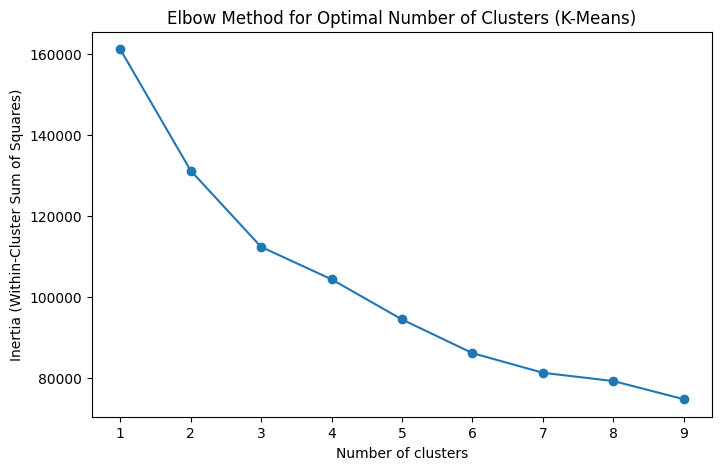

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (K-Means)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [57]:
# Optimal k
optimal_k = 4

# K-Means Clustering

In [58]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.20551229154590864


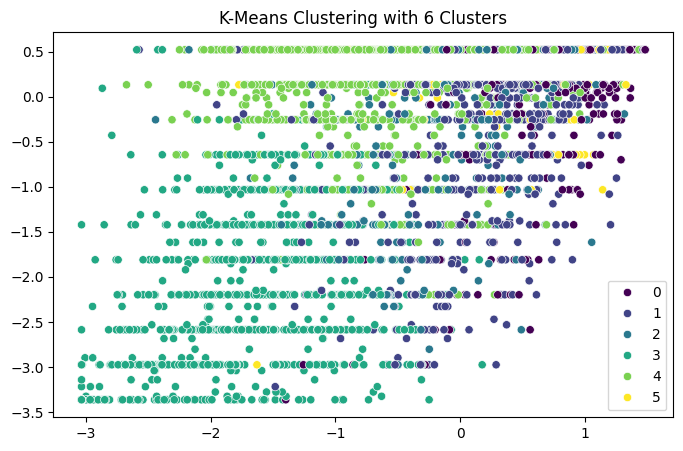

In [59]:
# Visualize the Clusters for K-Means
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.show()

Based on the Silhoutte score, the clusters aren't well separated. We can also see it in the visualization that a lot of clusters overlap. Going to try PCA to reduce dimensions and see if that helps.

**PCA**

In [60]:
from sklearn.decomposition import PCA

In [61]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

In [62]:
# Get the PCA components (dimensions)
pca_components = pca.components_

# Create display for feature contributions to each component
df_pca_components = pd.DataFrame(
    data=pca_components,
    columns=df_new.columns,
    index=[f'PC{i+1}' for i in range(pca_components.shape[0])]  # Naming the components as PC1, PC2, etc.
)

# Display the contributions of each feature to the principal components
print(df_pca_components)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
PC1  -0.054870           0.054203   0.369381                0.330872   
PC2   0.397192           0.229361  -0.022016                0.121712   
PC3   0.265725           0.424719   0.023556                0.108454   
PC4   0.221604           0.207347   0.241315               -0.217228   
PC5  -0.074686          -0.015899   0.022596                0.018311   
PC6   0.166035          -0.056656  -0.099710                0.141953   
PC7   0.238410           0.556583  -0.291117               -0.092202   
PC8  -0.069177           0.156112   0.120106               -0.029361   
PC9  -0.073692          -0.257992  -0.362536               -0.114504   
PC10  0.107391          -0.115056  -0.054795                0.718480   
PC11  0.147783          -0.167678   0.131165               -0.116154   
PC12  0.093371          -0.311966   0.157965               -0.044970   

      CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
PC1      -0.2

In [63]:
explained_variance_ratios = pca.explained_variance_ratio_
print("\nExplained Variance Ratios for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"PC{i+1}: {ratio:.4f}")


Explained Variance Ratios for each Principal Component:
PC1: 0.2718
PC2: 0.2046
PC3: 0.1106
PC4: 0.0878
PC5: 0.0629
PC6: 0.0574
PC7: 0.0438
PC8: 0.0384
PC9: 0.0288
PC10: 0.0245
PC11: 0.0154
PC12: 0.0147


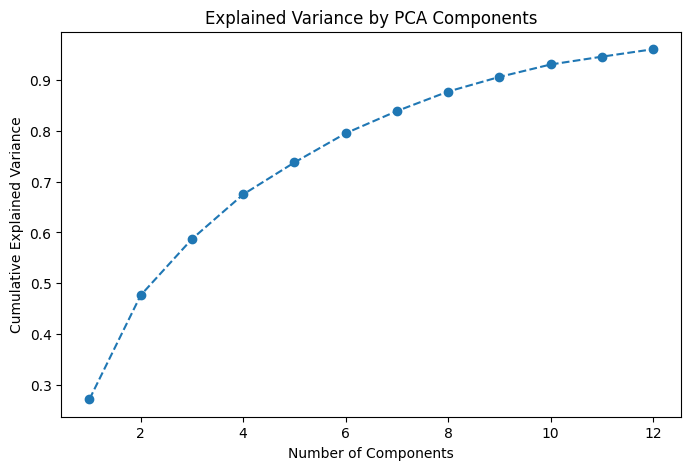

In [64]:
# Explained variance ratio by PCA components
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Redo Elbow Method with PCA Data

In [65]:
# Redo Elbow Method with PCA data
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

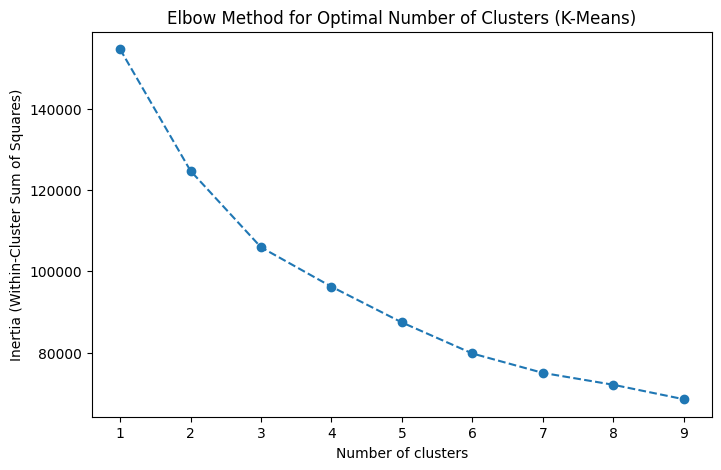

In [66]:
# Plot the new Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (K-Means)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

Looks like 3 now.

In [83]:
# Optimal k
pca_optimal_k = 3

In [84]:
# K-Means Clustering with PCA
kmeans = KMeans(n_clusters=pca_optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.2056080504295896


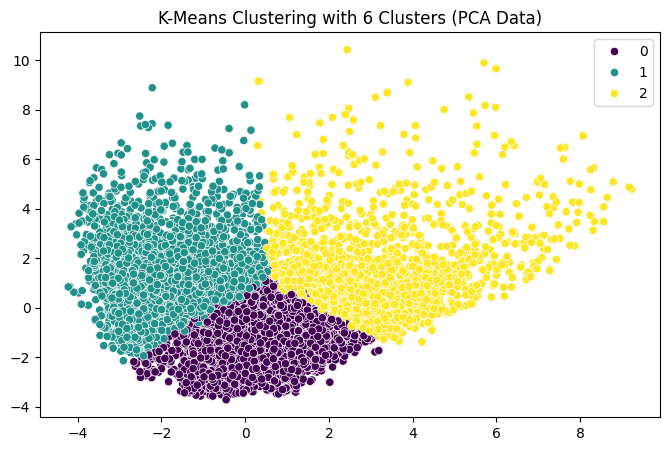

In [85]:
# Visualize the Clusters for K-Means with PCA data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_k} Clusters (PCA Data)')
plt.show()

Improved Silhouette Score and clusters after PCA.

# DBSCAN

# Hierarchical Clustering

# Special Clustering

# Gaussian Mixture (GMM) Clustering

Before PCA

In [86]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)
gmm_silhouette = silhouette_score(scaled_data, gmm_labels)
print(f"Gaussian Mixture Silhouette Score: {gmm_silhouette}")

Gaussian Mixture Silhouette Score: 0.1627291914674788


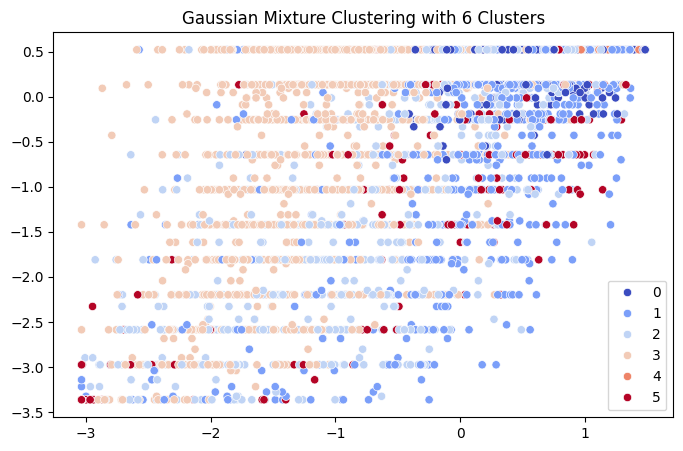

In [87]:
# Visualize GMM Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=gmm_labels, palette='coolwarm')
plt.title(f'Gaussian Mixture Clustering with {optimal_k} Clusters')
plt.show()

After PCA

In [88]:
# GMM Clustering with PCA Data
gmm = GaussianMixture(n_components=pca_optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(pca_data)
gmm_silhouette = silhouette_score(pca_data, gmm_labels)
print(f"Gaussian Mixture Silhouette Score: {gmm_silhouette}")

Gaussian Mixture Silhouette Score: 0.160056213478503


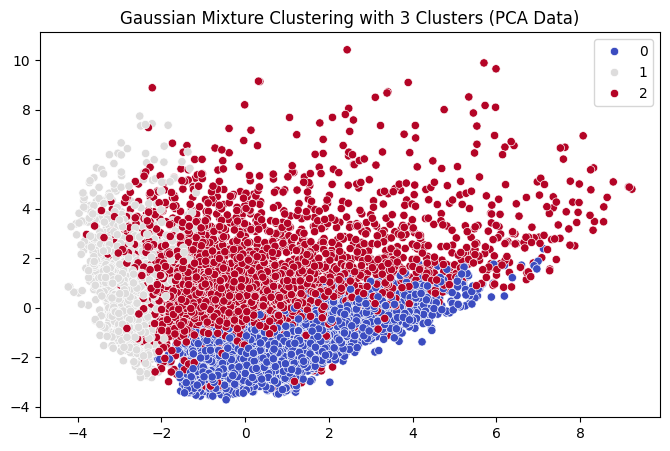

In [89]:
# Visualize GMM Clusters with PCA data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_labels, palette='coolwarm')
plt.title(f'Gaussian Mixture Clustering with {pca_optimal_k} Clusters (PCA Data)')
plt.show()

# Agglomerative Clustering

Before PCA

In [90]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(scaled_data)
agg_silhouette = silhouette_score(scaled_data, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

Agglomerative Clustering Silhouette Score: 0.16204482013038465


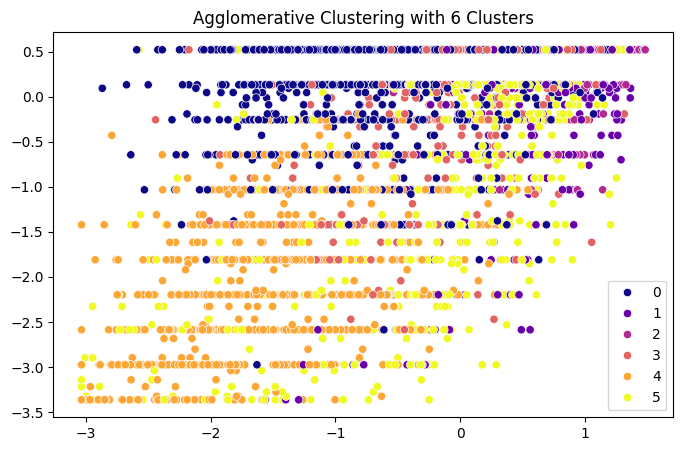

In [91]:
# Visualize the Clusters for Agglomerative Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=agg_labels, palette='plasma')
plt.title(f'Agglomerative Clustering with {optimal_k} Clusters')
plt.show()

After PCA

In [92]:
agg_clustering = AgglomerativeClustering(n_clusters=pca_optimal_k)
agg_labels = agg_clustering.fit_predict(pca_data)
agg_silhouette = silhouette_score(pca_data, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

Agglomerative Clustering Silhouette Score: 0.17552926668737956


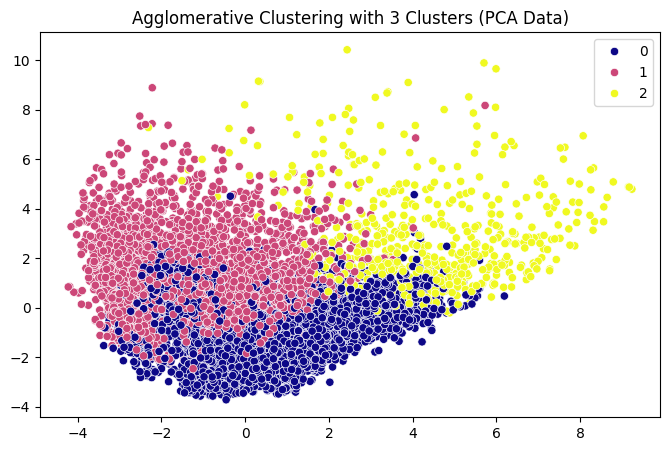

In [93]:
# Visualize the Clusters for Agglomerative Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=agg_labels, palette='plasma')
plt.title(f'Agglomerative Clustering with {pca_optimal_k} Clusters (PCA Data)')
plt.show()

# Mean Shift Clustering

# Birch Clustering

# Optics Clustering